In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("nfl.csv") #name of the csv file
df = df.dropna(subset=["Pos", "Forty", "Vertical", "BenchReps", "BroadJump", "Cone", "Shuttle", "Year", "Pfr_ID"])
df["Drafted"] = df["Team"].notnull().astype(int) #Labels for Drafted
df = df[df["Year"] != 2018] #to drop observations with 2018 if needed
df

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Pfr_ID,AV,Team,Round,Pick,Drafted
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,AlfoDa20,0.0,Kansas City Chiefs,6.0,188.0,1
7,Corey Atkins,OLB,72,237,4.72,31.0,21.0,112.0,7.96,4.39,2000,AtkiCo20,1.0,NaN,NaN,NaN,0
9,Reggie Austin,CB,69,175,4.44,35.0,17.0,119.0,7.03,4.14,2000,AustRe20,3.0,Chicago Bears,4.0,125.0,1
12,Rashidi Barnes,FS,72,208,4.62,35.0,10.0,114.0,6.92,4.32,2000,BarnRa20,1.0,Cleveland Browns,7.0,225.0,1
13,David Barrett,CB,70,199,4.44,37.5,16.0,116.0,6.81,4.04,2000,BarrDa22,10.0,Arizona Cardinals,4.0,102.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5872,Marcus Williams-02,FS,73,202,4.56,43.5,14.0,129.0,6.85,4.20,2017,WillMa06,0.0,NaN,NaN,NaN,0
5873,Joe Williams,RB,71,210,4.41,35.0,14.0,125.0,7.19,4.19,2017,WillJo12,0.0,San Francisco 49ers,4.0,121.0,1
5875,Jordan Willis,DE,76,255,4.53,39.0,24.0,125.0,6.85,4.28,2017,WillJo09,2.0,Cincinnati Bengals,3.0,73.0,1
5876,Quincy Wilson-02,CB,73,211,4.54,32.0,14.0,118.0,6.86,4.02,2017,WilsQu01,2.0,Indianapolis Colts,2.0,46.0,1


In [25]:
df["Ht"].min()

65

Text(0.5, 1.0, 'Figure 1: Yearly Report of Players Draft Results')

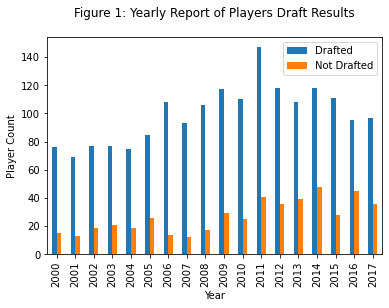

In [3]:
years = df["Year"].unique().tolist()
drafted = []
not_drafted = []
proportion = {}
for year in years:
    num_not_drafted = df[df["Year"] == year]["Team"].isnull().sum() #number of not drafted players
    num_drafted = df[df["Year"] == year]["Team"].notnull().sum() #number of drafted players
    not_drafted.append(num_not_drafted)
    drafted.append(num_drafted)
    proportion[year] = num_drafted / (num_drafted + num_not_drafted) #calculates proportion

ax = plt.subplot()
bar_plot_drafted = pd.DataFrame({'Drafted': drafted, 'Not Drafted': not_drafted}, index=years)
bar_plot_drafted.plot.bar(ax = ax)
ax.set_xlabel("Year")
ax.set_ylabel("Player Count")
ax.set_title("Figure 1: Yearly Report of Players Draft Results", pad=20)

In [4]:
proportion #proportion of people draft each year

{2000: 0.8351648351648352,
 2001: 0.8414634146341463,
 2002: 0.8020833333333334,
 2003: 0.7857142857142857,
 2004: 0.7978723404255319,
 2005: 0.7657657657657657,
 2006: 0.8852459016393442,
 2007: 0.8857142857142857,
 2008: 0.8617886178861789,
 2009: 0.8013698630136986,
 2010: 0.8148148148148148,
 2011: 0.7819148936170213,
 2012: 0.7662337662337663,
 2013: 0.7346938775510204,
 2014: 0.7108433734939759,
 2015: 0.7985611510791367,
 2016: 0.6785714285714286,
 2017: 0.7293233082706767}

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression

In [41]:
model = Pipeline([ #creating model
                       ("std", StandardScaler()),
                        ("lr", LogisticRegression())
                        ])
model1 = LogisticRegression(max_iter=10000)

In [42]:
train, test = train_test_split(df, random_state=0) #70/30 train?
features = ["Ht", "Wt", "Forty", "Vertical", "BenchReps", "BroadJump", "Cone", "Shuttle"]

In [43]:
train[features]

,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle
1070,80,262,4.83,35.0,24.0,112.0,7.26,4.33
4053,70,191,4.48,34.5,19.0,118.0,6.97,4.03
1882,72,196,4.44,40.5,15.0,126.0,6.48,3.82
3063,75,300,4.83,33.0,34.0,108.0,7.50,4.55
2062,75,245,4.93,32.0,19.0,112.0,7.47,4.30
...,...,...,...,...,...,...,...,...
3185,80,309,5.32,22.0,19.0,94.0,7.87,4.88
4638,71,203,4.41,32.5,17.0,117.0,7.15,4.27
2465,77,261,4.82,32.0,17.0,115.0,7.38,4.53
2708,72,210,4.42,36.5,20.0,125.0,6.90,4.19


In [48]:
model1.fit(train[features], train["Drafted"])
model1.predict(test[features])
model1.score(test[features], test["Drafted"]) #score of model

0.795774647887324

In [49]:
model.fit(train[features], train["Drafted"])
model.predict(test[features])
model.score(test[features], test["Drafted"]) #score of model

0.7922535211267606

In [46]:
model["lr"].coef_[0] #coefficients

array([ 0.03548378,  1.21462882, -0.95429723,  0.35265925,  0.28849538,
       -0.13510098, -0.03443113, -0.27345877])

Text(0, 0.5, 'Features')

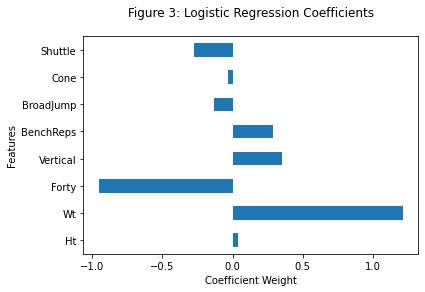

In [47]:
ax = plt.subplot()
coef = pd.Series(model["lr"].coef_[0], index = features)
coef.plot.barh(ax=ax)
ax.set_title("Figure 3: Logistic Regression Coefficients", pad=20)
ax.set_xlabel("Coefficient Weight")
ax.set_ylabel("Features")

In [12]:
from sklearn.decomposition import PCA
pca = PCA(len(features))
pca.fit(df[features])
variance = pca.explained_variance_ratio_
variance

array([9.67852710e-01, 1.86688473e-02, 9.94796840e-03, 2.31808705e-03,
       1.17480848e-03, 2.56247423e-05, 6.46121256e-06, 5.49308930e-06])

In [13]:
m1 = Pipeline([ #creating model
                        ("std", StandardScaler()),
                        ("pca", PCA(len(features)))
                        ])
m1.fit(df[features])
variance_std = m1["pca"].explained_variance_ratio_
variance_std

array([0.70130923, 0.10415483, 0.07682283, 0.04859008, 0.02803729,
       0.01816724, 0.0153055 , 0.007613  ])

Text(0, 0.5, 'Explained Variance')

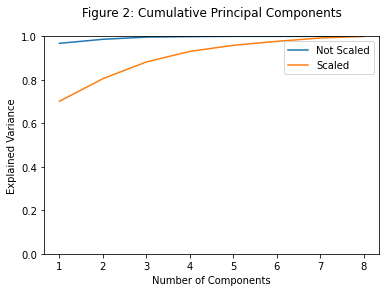

In [14]:
cumulative = []
cumulative_std = []

for i in range(1, len(variance) + 1): #sum up variance to get cumulative
    cumulative_ratio = 0
    cumulative_std_ratio = 0
    for j in range(i):
        cumulative_ratio += variance[j]
        cumulative_std_ratio += variance_std[j]
    cumulative.append(cumulative_ratio)
    cumulative_std.append(cumulative_std_ratio)
    
indicies = [num_components for num_components in range(1, len(variance) + 1)]
varianceDf = pd.DataFrame({"Not Scaled" : cumulative,
                              "Scaled" : cumulative_std}, indicies)
ax = plt.subplot()
varianceDf.plot.line(ylim=[0, 1], ax=ax)
ax.set_title("Figure 2: Cumulative Principal Components", pad=20)
ax.set_xlabel("Number of Components")
ax.set_ylabel("Explained Variance")

In [ ]:
###ATTEMPT AT ANOTHER MODEL. DID NOT INCLUDE IN REPORT.

In [15]:
m2 = Pipeline([ #creating model
                        ("std", StandardScaler()),
                        ("pca", PCA(0.8))
                        ])

In [16]:
m2.fit(df[features])
m2["pca"].components_

array([[ 0.29408819,  0.39970218,  0.39576025, -0.34486982,  0.25153708,
        -0.36789154,  0.37711024,  0.37062341],
       [ 0.3894862 ,  0.22929591, -0.07205676,  0.3974474 ,  0.70426969,
         0.31281476, -0.11622927, -0.15877393]])

In [17]:
components = m2["pca"].transform(df[features])

In [18]:
first_pca_component = components[:, 0]
second_pca_component = components[:, 1]
df1 = pd.DataFrame({"First PCA":first_pca_component, "Second PCA":second_pca_component, "Draft":df["Drafted"]})
df1

,First PCA,Second PCA,Draft
2,125.677060,159.547806,1
7,75.788050,142.569612,0
9,44.609201,128.315184,1
12,58.856803,130.527682,1
13,54.366078,133.600125,1
...,...,...,...
5872,49.214441,140.460508,0
5873,56.291989,136.859219,1
5875,76.837550,157.774034,1
5876,60.753715,134.541422,1


<AxesSubplot:xlabel='First PCA', ylabel='Second PCA'>

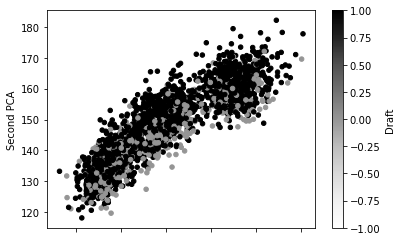

In [19]:
df1.plot.scatter(x="First PCA", y="Second PCA", c= "Draft", vmin=-1)